In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from sklearn.model_selection import train_test_split
import shutil

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


## Load the data

### Training data

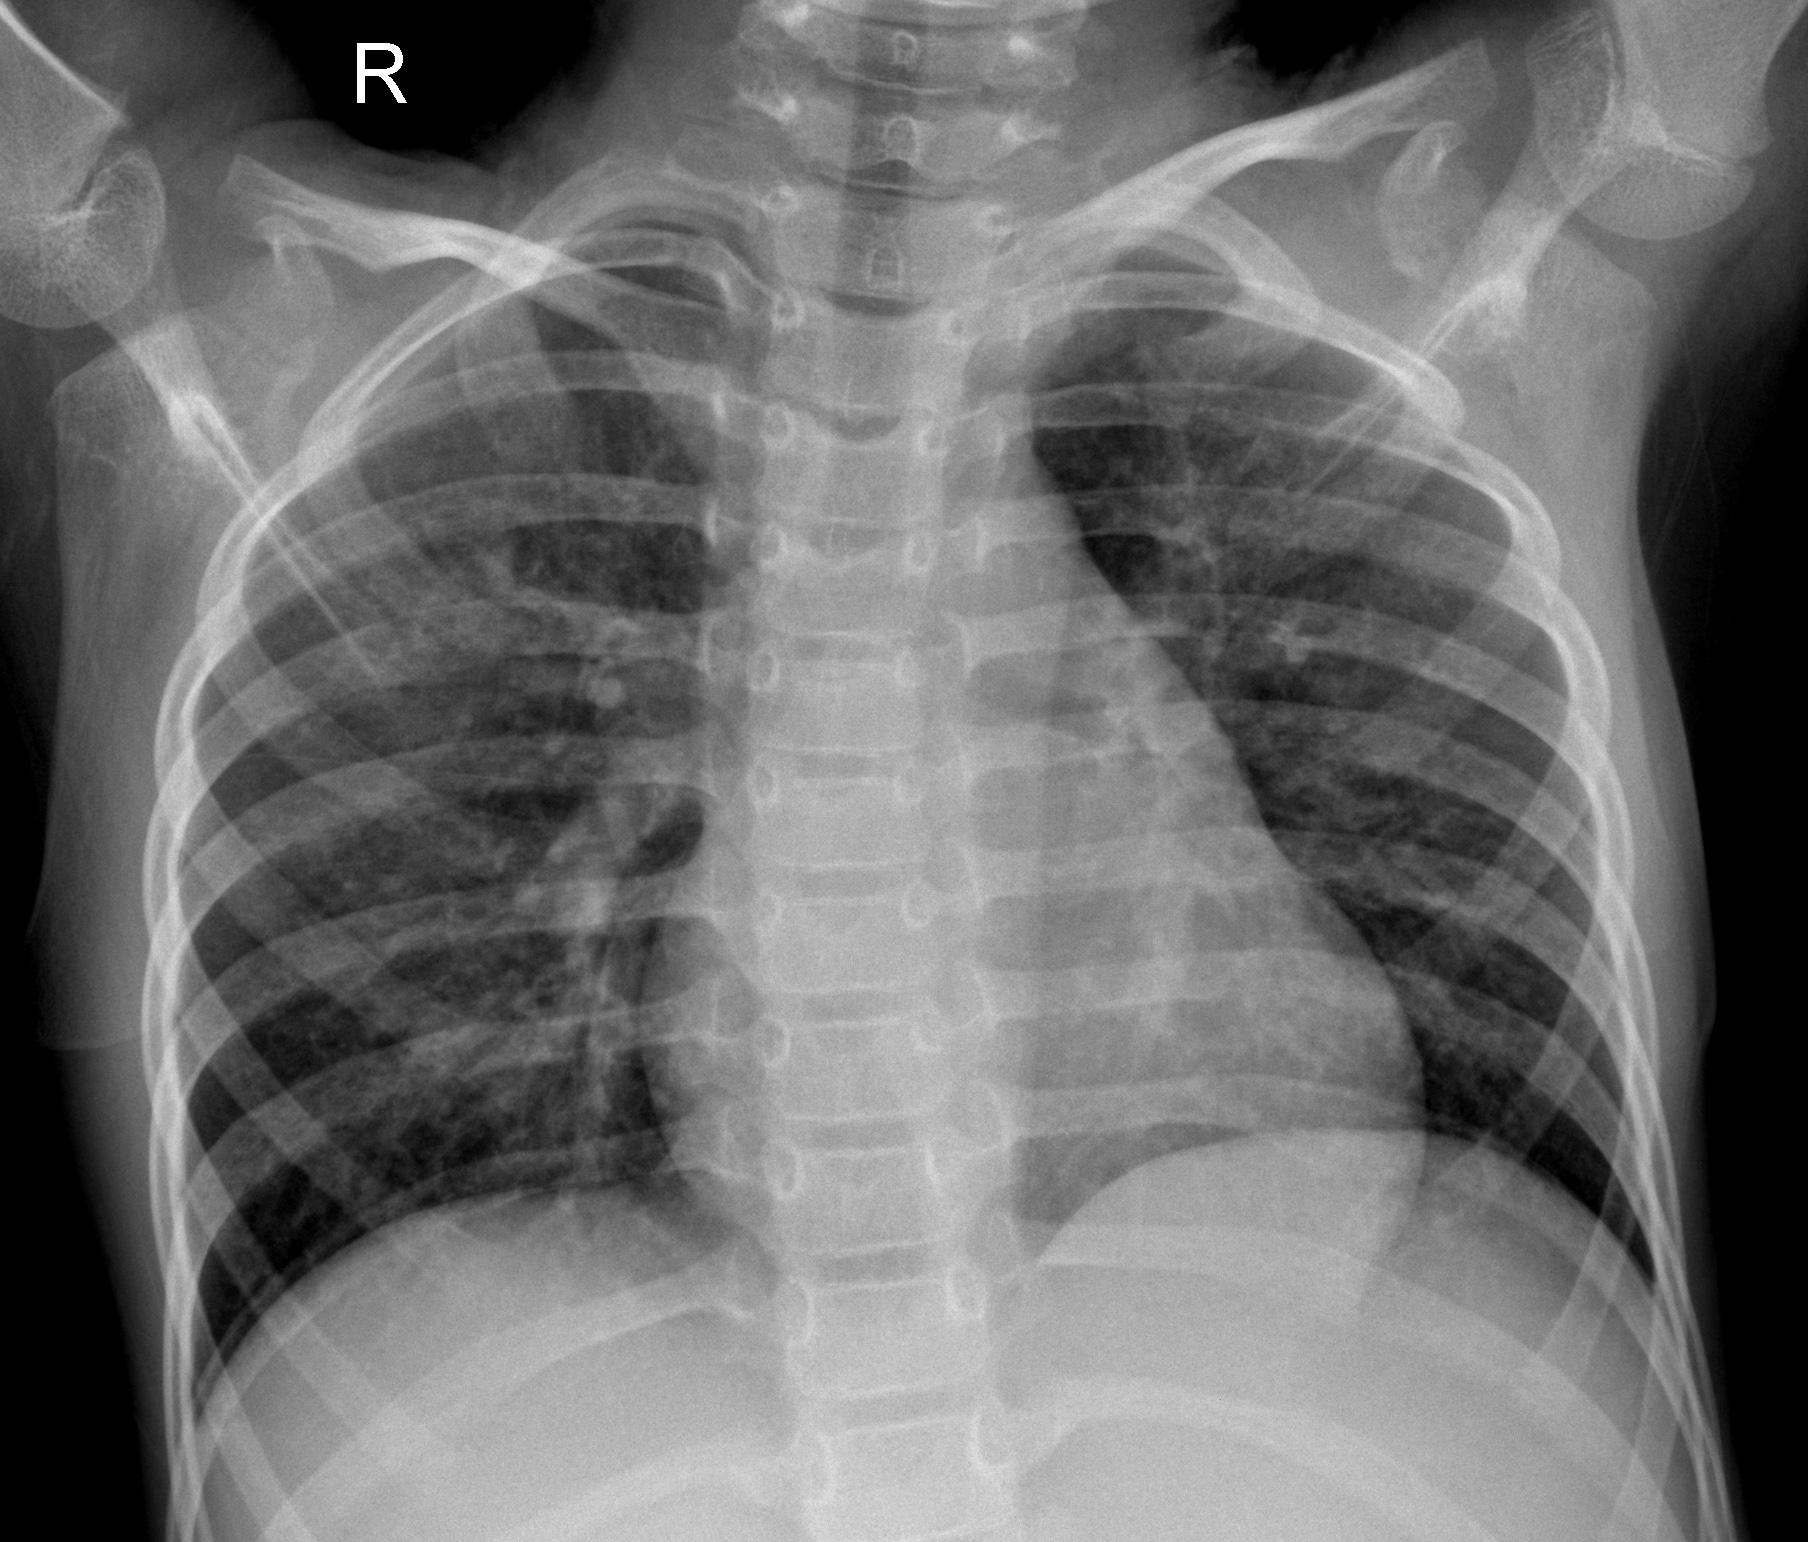

In [2]:
# for dirname, _, filename in os.walk('chest_xray/chest_xray/train'):
#     for filesnames in filename:
#         print(os.path.join(dirname, filesnames))
        
# img.open('chest_xray/chest_xray/train/PNEUMONIA/person1194_bacteria_3143.jpeg')
Image.open('chest_xray/chest_xray/train/NORMAL/NORMAL2-IM-0623-0001.jpeg')


In [3]:
# Load the image data using ImageDataGenerator
# See more: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

training_dir = 'chest_xray/chest_xray/train'
training_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 5216 images belonging to 2 classes.


### Validation data

In [4]:
validation_dir = 'chest_xray/chest_xray/val'
validation_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_generator = validation_generator.flow_from_directory(validation_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 16 images belonging to 2 classes.


### Testing data

In [5]:
testing_dir = 'chest_xray/chest_xray/test'
testing_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = testing_generator.flow_from_directory(testing_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 624 images belonging to 2 classes.


## Load the data (Round 2)

###### Get images for training and validation. *tf.io.gfile.glob* returns a list of files that match the given pattern(s).

In [6]:
training_set = tf.io.gfile.glob(str('chest_xray/train/*/*'))
validation_set = tf.io.gfile.glob(str('chest_xray/val/*/*'))

print('Training size: ', len(training_set))
print('Validation size: ', len(validation_set))

Training size:  5216
Validation size:  16


###### Change train/val split to 80/20.

In [7]:
# Aggregate files into one section
filenames = training_set
filenames.extend(validation_set)

# Perform train/test split on aggregation
train_filenames, val_filenames = train_test_split(filenames, test_size=0.2)

# Now train/val split is 80/20
print('Training size: ', len(train_filenames))
print('Validation size: ', len(val_filenames))
print('Train/Val split: ', 
      round(len(train_filenames)/len(filenames), 2), 
      '/', 
      round(len(val_filenames)/len(filenames), 2))

Training size:  4185
Validation size:  1047
Train/Val split:  0.8 / 0.2


###### Write function to check label.

In [8]:
# 0 - Normal
# 1 - Pneumonia
def check_label(filename):
    # Split filename on delimeter '/'
    label = tf.strings.split(filename, '/')
    # Label directory is stored second from last
    if label[-2] == 'NORMAL': return 0 
    else: return 1

## Visualize the data

###### Plot the first 25 images of the training set.

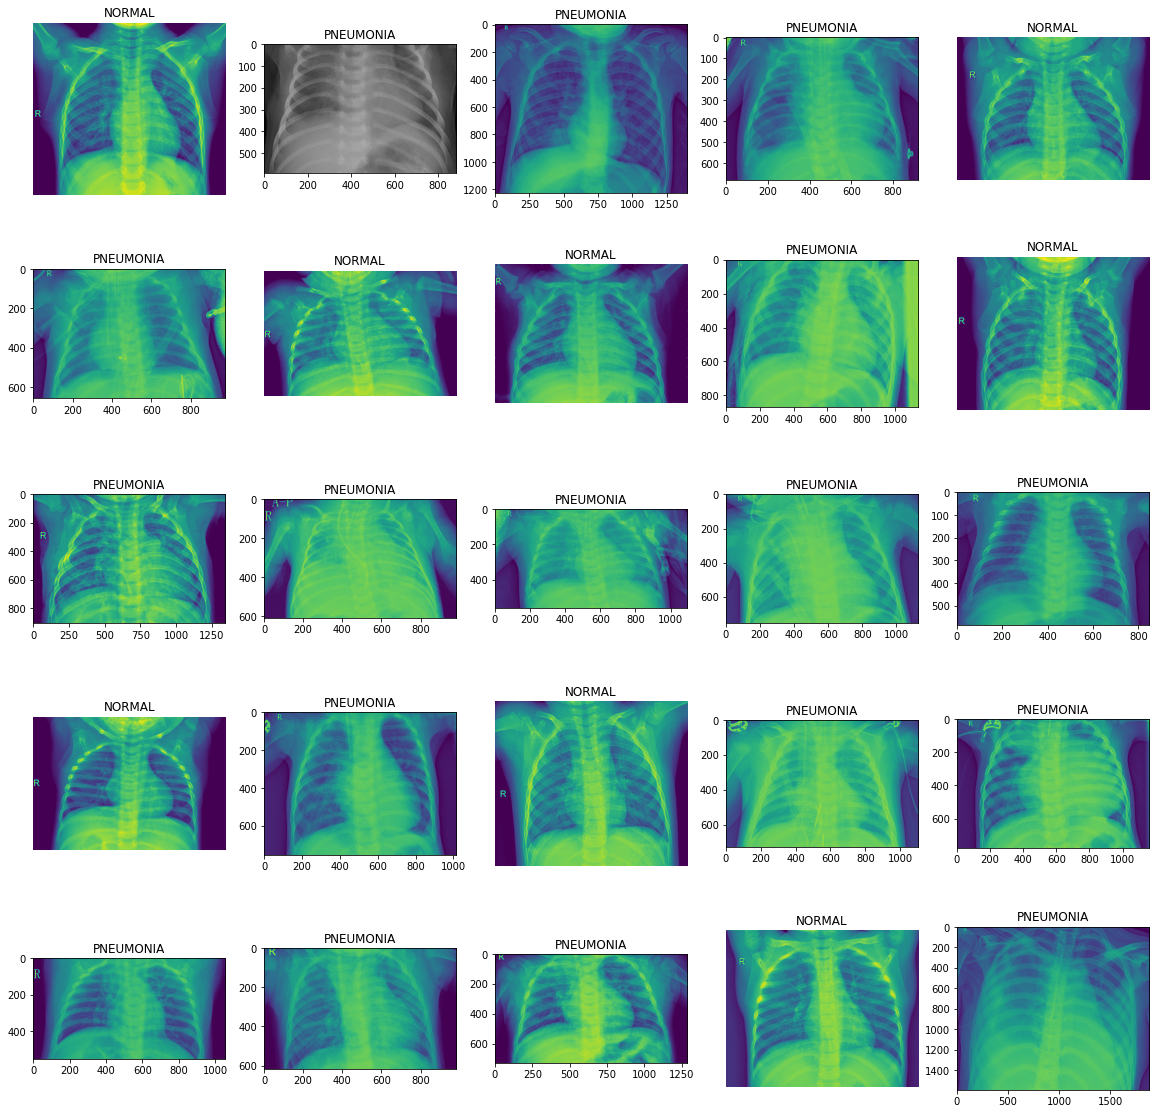

In [9]:
plt.figure(figsize=(20,20))
for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(Image.open(train_filenames[i]))
    if check_label(train_filenames[i]): 
        plt.title("PNEUMONIA")
    else:
        plt.title("NORMAL")
        plt.axis("off")

###### Check ratio of labels (how balanced is the data?).

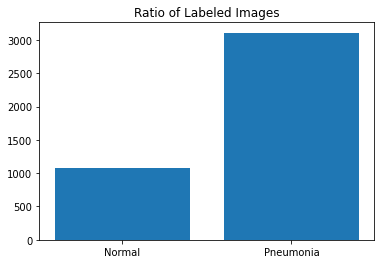

Normal:  1076
Pneumonia:  3109


In [10]:
# Counters for each label
normal = 0
pneumonia = 0

# Iterate through files in training set and check labels
for file in train_filenames:
    if check_label(file) == 0:
        normal += 1
    else:
        pneumonia += 1

counts = [normal, pneumonia]
plt.bar(['Normal', 'Pneumonia'], counts)
plt.title('Ratio of Labeled Images')
plt.show()

print('Normal: ', normal)
print('Pneumonia: ', pneumonia)

## Data pre-processing

In [11]:
# Load the image data using ImageDataGenerator
# See more: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

# training_dir = 'chest_xray/chest_xray/train'
# training_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# train_generator = training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

# Returns a list of files that match this pattern
# tf.io.gfile.glob(str('chest_xray/train/*/*'))

# for file in train_filenames:
#     # Check whether file comes from train or validation set
#     label = tf.strings.split(file, '/')
#     if label[1] == 'train': 
#         directory = 'chest_xray/train/' 
#     else: 
#         directory = 'chest_xray/val/'
#     # Instantiate ImageDataGenerator
#     tensor_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
#     # Generate tensors for each file
#     query = tf.io.gfile.glob(str(file))
#     tensor = tensor_generator.

temp_dir = 'temp_train/'
os.mkdir(temp_dir)
for file in train_filenames:
    # Move all training files to a temporary directory
    shutil.copy(file, temp_dir)
#     print(file)

# # Instantiate ImageDataGenerator
# training_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# # Generate tensors for each file
# train_generator = training_generator.flow_from_directory(temp_dir,target_size=(200,200),batch_size=4,class_mode='binary')

# # training_dir = 'chest_xray/chest_xray/train'
# # training_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# # train_generator = training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

# os.system('rm -rf temp_train')

* References: https://www.kaggle.com/amyjang/tensorflow-pneumonia-classification-on-x-rays
